# Importing Libraries



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
df=pd.read_csv('ds.csv')

In [3]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Cleaning the dataset

In [5]:
# finding the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
print("Dataset after rremoving the nulll values")
df

Dataset after rremoving the nulll values


PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

# Visualizing the cleaned dataset

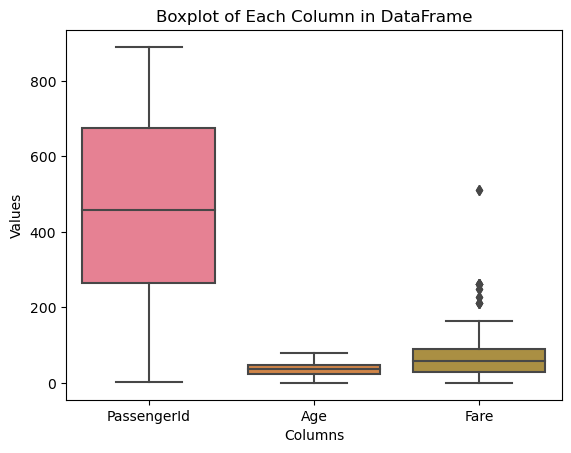

In [19]:
# Set the color palette
colors = sns.color_palette("husl", len(df.columns))

# Create the boxplot
box = sns.boxplot(data=df[['PassengerId','Age','Fare']], palette=colors)

# Customize the plot
plt.title('Boxplot of Each Column in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()


## Removing outliers

In [22]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from the DataFrame
df_no_outliers = remove_outliers(df)


C:\Users\AKHIL\AppData\Local\Temp\ipykernel_9340\931821679.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\AKHIL\AppData\Local\Temp\ipykernel_9340\931821679.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\AKHIL\AppData\Local\Temp\ipykernel_9340\931821679.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


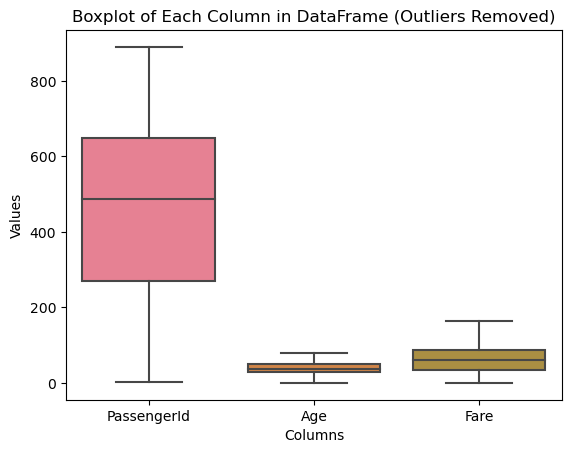

In [25]:
# Setting the color palette
colors = sns.color_palette("husl", len(df_no_outliers.columns))

# Creating the boxplot for dataframe without outliers
box = sns.boxplot(data=df_no_outliers[['PassengerId','Age','Fare']], palette=colors)


# Customize the plot
plt.title('Boxplot of Each Column in DataFrame (Outliers Removed)')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()


In [28]:
df.to_csv('cleaned.csv',index=False)